# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [72]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import urllib.request
import json

# Import API key
from api_keys import weather2_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)



In [46]:
### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).
###

SyntaxError: invalid syntax (<ipython-input-46-a5ca2c3804f4>, line 2)

In [73]:
#Get data from API

url = "http://api.openweathermap.org/data/2.5/weather?"

units = "metrics"
# Build query URL
query_url = f"{url}units={units}&APPID={weather2_api_key}&q="

In [74]:
url

'http://api.openweathermap.org/data/2.5/weather?'

In [75]:
response=(requests.get(query_url+"punta arenas").json())

In [76]:
response

{'coord': {'lon': -70.92, 'lat': -53.15},
 'weather': [{'id': 800,
   'main': 'Clear',
   'description': 'clear sky',
   'icon': '01d'}],
 'base': 'stations',
 'main': {'temp': 284.98,
  'feels_like': 279.29,
  'temp_min': 284.82,
  'temp_max': 285.15,
  'pressure': 1014,
  'humidity': 58},
 'visibility': 10000,
 'wind': {'speed': 6.2, 'deg': 280},
 'clouds': {'all': 0},
 'dt': 1609800232,
 'sys': {'type': 1,
  'id': 8487,
  'country': 'CL',
  'sunrise': 1609748744,
  'sunset': 1609809085},
 'timezone': -10800,
 'id': 3874787,
 'name': 'Punta Arenas',
 'cod': 200}

In [77]:
cities = ["punta arenas","kapaa","severomuysk","waddan", "dikson", "mumford", "hithadhoo", "faya", "butaritari", "yerbogachen", "cape town", "touba", "jamestown"]

city_data=[]
# set up lists to hold reponse info
lat = []
temp = []
# Loop through the list of cities and perform a request for data on each
for city in cities:
    response = requests.get(query_url + city).json()
    max_temp = response['main']['temp_max']
    humidity = response['main']['humidity']
    cloudiness = response['clouds']
    date = response['dt']
    lat = response['coord']['lat']
    lng = response['coord']['lon']
    wind_speed = response['wind']
    
    city_data.append({
        "City":response['name'],
        "Lat":lat,
        "Lng": lng,
        "Max Temp":max_temp,
        "Humidity":humidity,
        "Cloudiness": cloudiness,
        "Wind Speed": wind_speed,
        "date" : date
    }
    )

In [78]:
city_data

[{'City': 'Punta Arenas',
  'Lat': -53.15,
  'Lng': -70.92,
  'Max Temp': 285.15,
  'Humidity': 58,
  'Cloudiness': {'all': 0},
  'Wind Speed': {'speed': 6.2, 'deg': 280},
  'date': 1609800232},
 {'City': 'Kapaa',
  'Lat': 22.08,
  'Lng': -159.32,
  'Max Temp': 299.15,
  'Humidity': 69,
  'Cloudiness': {'all': 20},
  'Wind Speed': {'speed': 4.1, 'deg': 60},
  'date': 1609800144},
 {'City': 'Severomuysk',
  'Lat': 56.15,
  'Lng': 113.43,
  'Max Temp': 238.2,
  'Humidity': 84,
  'Cloudiness': {'all': 95},
  'Wind Speed': {'speed': 2.48, 'deg': 324},
  'date': 1609800238},
 {'City': 'Waddān',
  'Lat': 29.16,
  'Lng': 16.14,
  'Max Temp': 283.11,
  'Humidity': 49,
  'Cloudiness': {'all': 73},
  'Wind Speed': {'speed': 1.8, 'deg': 56},
  'date': 1609800239},
 {'City': 'Dikson',
  'Lat': 73.51,
  'Lng': 80.55,
  'Max Temp': 252.18,
  'Humidity': 91,
  'Cloudiness': {'all': 100},
  'Wind Speed': {'speed': 10.84, 'deg': 210},
  'date': 1609800239},
 {'City': 'Mumford',
  'Lat': 5.26,
  'Lng': 

In [56]:
df.to_csv('output_data/citiesSDC.csv')

## Generate Cities List

In [93]:
#make a request for each city
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather2_api_key


city_data_1 = []


print("Beginning Data Retrieval     ")
print("-----------------------------")


record_count = 1
set_count = 1


for i, city in enumerate(cities):
        
    
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    
    city_url = url + "&q=" + city
    
    
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

  
    record_count += 1
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

    
        city_data_1.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    except:
        print("City not found. Skipping...")
        pass
             
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | sokolo
Processing Record 2 of Set 1 | ust-tsilma
Processing Record 3 of Set 1 | bud
Processing Record 4 of Set 1 | sioux lookout
Processing Record 5 of Set 1 | castro
Processing Record 6 of Set 1 | mana
Processing Record 7 of Set 1 | busselton
Processing Record 8 of Set 1 | yumen
Processing Record 9 of Set 1 | kahului
Processing Record 10 of Set 1 | siatista
Processing Record 11 of Set 1 | sitka
Processing Record 12 of Set 1 | hermanus
Processing Record 13 of Set 1 | sao joao da barra
Processing Record 14 of Set 1 | new norfolk
Processing Record 15 of Set 1 | rancho palos verdes
Processing Record 16 of Set 1 | bauchi
Processing Record 17 of Set 1 | codrington
Processing Record 18 of Set 1 | punta arenas
Processing Record 19 of Set 1 | yellowknife
Processing Record 20 of Set 1 | kodiak
Processing Record 21 of Set 1 | east london
Processing Record 22 of Set 1 | nizhneyansk
City not found. Skipping.

Processing Record 43 of Set 4 | illoqqortoormiut
City not found. Skipping...
Processing Record 44 of Set 4 | turbat
Processing Record 45 of Set 4 | davila
Processing Record 46 of Set 4 | ust-maya
Processing Record 47 of Set 4 | kariba
Processing Record 48 of Set 4 | saryshagan
City not found. Skipping...
Processing Record 49 of Set 4 | bongandanga
Processing Record 0 of Set 5 | dingle
Processing Record 1 of Set 5 | aiquile
Processing Record 2 of Set 5 | cherskiy
Processing Record 3 of Set 5 | aktau
Processing Record 4 of Set 5 | umzimvubu
City not found. Skipping...
Processing Record 5 of Set 5 | darhan
Processing Record 6 of Set 5 | sola
Processing Record 7 of Set 5 | negombo
Processing Record 8 of Set 5 | kashi
Processing Record 9 of Set 5 | bethel
Processing Record 10 of Set 5 | pervomayskiy
Processing Record 11 of Set 5 | atbasar
Processing Record 12 of Set 5 | cidreira
Processing Record 13 of Set 5 | namie
Processing Record 14 of Set 5 | westport
Processing Record 15 of Set 5 | bo

Processing Record 35 of Set 8 | isangel
Processing Record 36 of Set 8 | kedrovyy
Processing Record 37 of Set 8 | halalo
City not found. Skipping...
Processing Record 38 of Set 8 | baykit
Processing Record 39 of Set 8 | buchanan
Processing Record 40 of Set 8 | buzmeyin
Processing Record 41 of Set 8 | swiecie
Processing Record 42 of Set 8 | alamosa
Processing Record 43 of Set 8 | mananara
Processing Record 44 of Set 8 | pavlodar
Processing Record 45 of Set 8 | camana
Processing Record 46 of Set 8 | atikokan
Processing Record 47 of Set 8 | cacheu
Processing Record 48 of Set 8 | campo grande
Processing Record 49 of Set 8 | praia
Processing Record 0 of Set 9 | pombia
Processing Record 1 of Set 9 | luan
Processing Record 2 of Set 9 | sao filipe
Processing Record 3 of Set 9 | antalaha
Processing Record 4 of Set 9 | kiruna
Processing Record 5 of Set 9 | snezhnogorsk
Processing Record 6 of Set 9 | launceston
Processing Record 7 of Set 9 | taoudenni
Processing Record 8 of Set 9 | namwala
Process

Processing Record 21 of Set 12 | keti bandar
Processing Record 22 of Set 12 | wajir
Processing Record 23 of Set 12 | nadym
Processing Record 24 of Set 12 | shipunovo
Processing Record 25 of Set 12 | luena
Processing Record 26 of Set 12 | kabinda
Processing Record 27 of Set 12 | inhambane
Processing Record 28 of Set 12 | zapolyarnyy
Processing Record 29 of Set 12 | puerto escondido
Processing Record 30 of Set 12 | saint-leu
Processing Record 31 of Set 12 | durban
Processing Record 32 of Set 12 | lata
Processing Record 33 of Set 12 | rungata
City not found. Skipping...
Processing Record 34 of Set 12 | dourbali
Processing Record 35 of Set 12 | pleszew
Processing Record 36 of Set 12 | aklavik
Processing Record 37 of Set 12 | naftah
City not found. Skipping...
Processing Record 38 of Set 12 | roebourne
Processing Record 39 of Set 12 | bandarbeyla
Processing Record 40 of Set 12 | awjilah
Processing Record 41 of Set 12 | alihe
Processing Record 42 of Set 12 | zhezkazgan
Processing Record 43 o

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | butaritari
Processing Record 2 of Set 1 | yerbogachen
Processing Record 3 of Set 1 | cape town
Processing Record 4 of Set 1 | touba
Processing Record 5 of Set 1 | jamestown
Processing Record 6 of Set 1 | rio grande
Processing Record 7 of Set 1 | ibra
Processing Record 8 of Set 1 | port elizabeth
Processing Record 9 of Set 1 | tuktoyaktuk
Processing Record 10 of Set 1 | avarua
Processing Record 11 of Set 1 | nemuro
Processing Record 12 of Set 1 | morgan city
Processing Record 13 of Set 1 | hobart
Processing Record 14 of Set 1 | kawalu
Processing Record 15 of Set 1 | hami
Processing Record 16 of Set 1 | ushuaia
Processing Record 17 of Set 1 | katsuura
Processing Record 18 of Set 1 | hjallerup
Processing Record 19 of Set 1 | punta arenas
Processing Record 20 of Set 1 | bengkulu
Processing Record 21 of Set 1 | victoria
Processing Record 22 of Set 1 | rangapara
Processing Record 23 of Set 1 | hithadho

Processing Record 36 of Set 4 | chimbote
Processing Record 37 of Set 4 | kanor
Processing Record 38 of Set 4 | san pedro de uraba
Processing Record 39 of Set 4 | taphan hin
Processing Record 40 of Set 4 | upernavik
Processing Record 41 of Set 4 | matagami
Processing Record 42 of Set 4 | terme
Processing Record 43 of Set 4 | coria
Processing Record 44 of Set 4 | pallasovka
Processing Record 45 of Set 4 | asyut
Processing Record 46 of Set 4 | cockburn town
Processing Record 47 of Set 4 | osypenko
Processing Record 48 of Set 4 | sioux lookout
Processing Record 49 of Set 4 | gotsu
Processing Record 0 of Set 5 | abadan
Processing Record 1 of Set 5 | lewistown
Processing Record 2 of Set 5 | toftir
City not found. Skipping...
Processing Record 3 of Set 5 | fortuna
Processing Record 4 of Set 5 | ostersund
Processing Record 5 of Set 5 | calafell
Processing Record 6 of Set 5 | panguna
Processing Record 7 of Set 5 | nantucket
Processing Record 8 of Set 5 | la ronge
Processing Record 9 of Set 5 | 

City not found. Skipping...
Processing Record 28 of Set 8 | porto walter
Processing Record 29 of Set 8 | horsham
Processing Record 30 of Set 8 | maraa
Processing Record 31 of Set 8 | vila franca do campo
Processing Record 32 of Set 8 | garoua
Processing Record 33 of Set 8 | kampot
Processing Record 34 of Set 8 | marawi
Processing Record 35 of Set 8 | egvekinot
Processing Record 36 of Set 8 | liverpool
Processing Record 37 of Set 8 | sanandaj
Processing Record 38 of Set 8 | tabou
Processing Record 39 of Set 8 | kavieng
Processing Record 40 of Set 8 | cap malheureux
Processing Record 41 of Set 8 | logan
Processing Record 42 of Set 8 | klaksvik
Processing Record 43 of Set 8 | sisimiut
Processing Record 44 of Set 8 | whyalla
Processing Record 45 of Set 8 | attawapiskat
City not found. Skipping...
Processing Record 46 of Set 8 | hailar
Processing Record 47 of Set 8 | ajdabiya
Processing Record 48 of Set 8 | saint-georges
Processing Record 49 of Set 8 | hoopstad
Processing Record 0 of Set 9 

Processing Record 19 of Set 12 | barra dos coqueiros
Processing Record 20 of Set 12 | provideniya
Processing Record 21 of Set 12 | norman wells
Processing Record 22 of Set 12 | yuzhno-yeniseyskiy
City not found. Skipping...
Processing Record 23 of Set 12 | follonica
Processing Record 24 of Set 12 | verkhoyansk
Processing Record 25 of Set 12 | henties bay
Processing Record 26 of Set 12 | kudahuvadhoo
Processing Record 27 of Set 12 | bandundu
Processing Record 28 of Set 12 | cascais
Processing Record 29 of Set 12 | dickinson
Processing Record 30 of Set 12 | san benito
Processing Record 31 of Set 12 | kenai
Processing Record 32 of Set 12 | rio pardo de minas
Processing Record 33 of Set 12 | erzin
Processing Record 34 of Set 12 | san carlos del zulia
Processing Record 35 of Set 12 | kyshtovka
Processing Record 36 of Set 12 | zima
Processing Record 37 of Set 12 | khandbari
Processing Record 38 of Set 12 | salyan
Processing Record 39 of Set 12 | saint-joseph
Processing Record 40 of Set 12 | 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [94]:
city_data_pd = pd.DataFrame(city_data_1)
city_data_pd.count()

City          552
Lat           552
Lng           552
Max Temp      552
Humidity      552
Cloudiness    552
Wind Speed    552
Country       552
Date          552
dtype: int64

In [99]:
city_data_pd.to_csv('output_data/citiesFinal.csv')

In [95]:
city_data_pd.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,sokolo,14.73,-6.12,76.62,18,0,11.61,ML,1609800410
1,ust-tsilma,65.44,52.15,-7.35,90,24,4.23,RU,1609800410
2,bud,39.45,-86.18,39.99,80,12,2.86,US,1609800410
3,sioux lookout,50.10,-91.92,30.20,86,75,5.82,CA,1609800410
4,castro,-24.79,-50.01,64.98,85,94,3.65,BR,1609800410


In [96]:
city_data_pd.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,552.000000,552.000000,552.000000,552.00000,552.000000,552.000000,5.520000e+02
mean,20.551322,16.278931,48.280018,75.28442,53.722826,7.648188,1.609800e+09
std,33.134057,88.722016,33.220125,18.79174,38.651277,5.464618,8.480737e+01
min,-54.800000,-175.200000,-50.330000,12.00000,0.000000,0.290000,1.609800e+09
25%,-6.152500,-62.302500,30.990000,66.00000,17.750000,3.360000,1.609800e+09
50%,25.430000,21.845000,60.800000,80.00000,59.500000,6.365000,1.609800e+09
75%,47.632500,84.155000,75.200000,88.00000,90.000000,10.290000,1.609800e+09
max,78.220000,179.320000,89.600000,100.00000,100.000000,34.450000,1.609800e+09


In [69]:
file = "output_data/cities.csv"
citySDC_data = pd.read_csv(file)
citySDC_data.tail()

,City_ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
543,543,yabrud,0,SY,1558378840,32,33.97,36.66,80.60,8.05
544,544,paraiso,5,MX,1558378898,4,24.01,-104.61,84.20,16.11
545,545,veraval,0,FR,1558378898,62,49.65,0.71,61.00,8.05
546,546,novyy urgal,100,RU,1558378899,93,51.07,132.56,49.74,2.68
547,547,tongren,4,CN,1558378899,64,27.72,109.18,55.86,2.84


,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,5.990000e+02
mean,19.877028,19.568998,69.794808,69.353923,51.569282,7.979416,1.593605e+09
std,33.262944,91.418472,15.678452,22.704698,35.405602,5.660694,5.738815e+01
min,-54.800000,-179.170000,12.200000,7.000000,0.000000,0.360000,1.593605e+09
25%,-8.540000,-61.210000,59.000000,55.000000,20.000000,3.620000,1.593605e+09
50%,24.370000,24.670000,73.110000,75.000000,59.000000,6.730000,1.593605e+09
75%,46.585000,102.255000,80.600000,87.000000,85.000000,11.050000,1.593605e+09
max,78.220000,179.320000,116.600000,100.000000,100.000000,42.500000,1.593605e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [102]:
city_dirty = city_data_pd[(city_data_pd["Humidity"]>100)]
city_dirty

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [103]:
city_dirty = city_data_pd.loc[(city_data_pd["Humidity"]>100)]
city_dirty

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [17]:
#  Get the indices of cities that have humidity over 100%.


Int64Index([], dtype='int64')

In [66]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".



,Lat,Lng,Max Temp,Cloudiness,Date
0,13.000000,13.000000,13,13.000000,1.300000e+01
1,17.815385,23.611538,283.193,49.923077,1.609699e+09
2,36.189720,90.426389,21.7279,45.717359,2.571794e+02
3,-53.150000,-159.320000,243.63,0.000000,1.609699e+09
4,73.510000,172.790000,302.93,100.000000,1.609699e+09
5,3.070000,-7.680000,275.37,1.000000,1.609699e+09
6,18.390000,18.420000,290.74,55.000000,1.609699e+09
7,42.100000,80.550000,300.04,100.000000,1.609699e+09


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

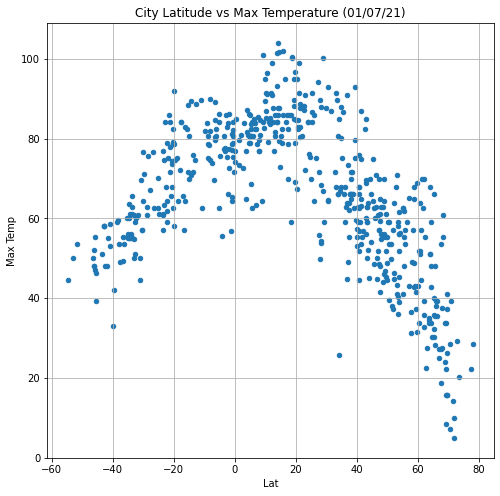

In [105]:
citySDC_data.plot(kind="scatter", x="Lat", y="Max Temp", grid=True, figsize=(8,8), title="City Latitude vs Max Temperature (01/07/21)")
plt.show()

In [107]:
plt.savefig('LatvsMax.png')

<Figure size 432x288 with 0 Axes>

## Latitude vs. Humidity Plot

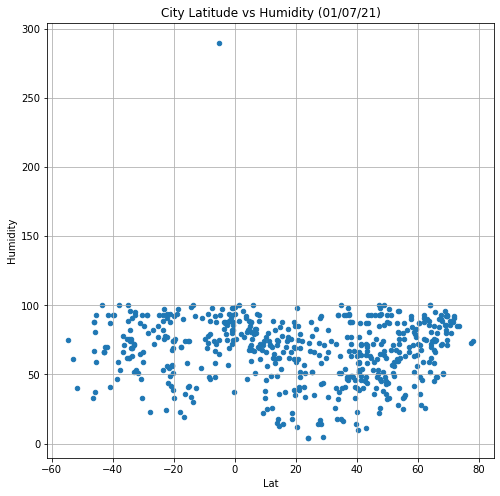

In [106]:
citySDC_data.plot(kind="scatter", x="Lat", y="Humidity", grid=True, figsize=(8,8), title="City Latitude vs Humidity (01/07/21)")
plt.show()

In [108]:
plt.savefig('LatvsHum.png')

<Figure size 432x288 with 0 Axes>

## Latitude vs. Cloudiness Plot

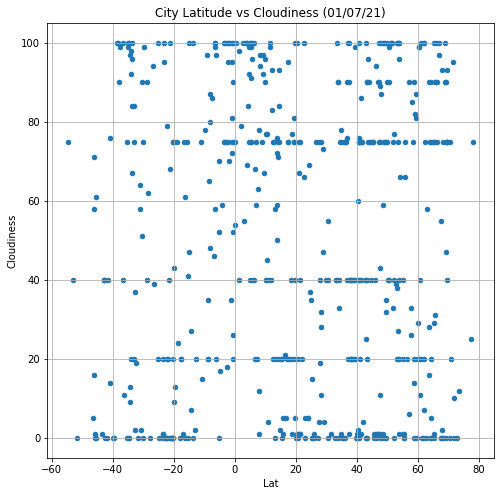

In [110]:
citySDC_data.plot(kind="scatter", x="Lat", y="Cloudiness", grid=True, figsize=(8,8), title="City Latitude vs Cloudiness (01/07/21)")
plt.show()

In [111]:
plt.savefig('Latvscloud.png')

<Figure size 432x288 with 0 Axes>

## Latitude vs. Wind Speed Plot

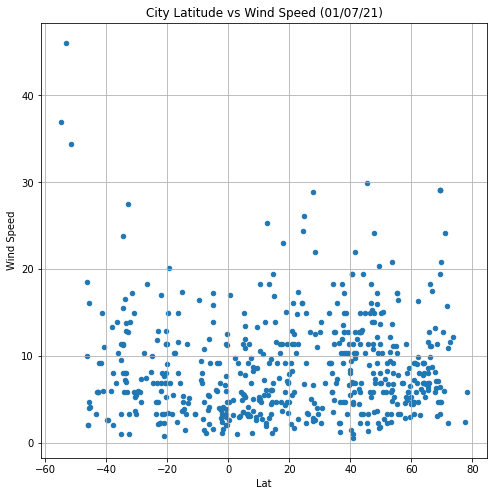

In [112]:
citySDC_data.plot(kind="scatter", x="Lat", y="Wind Speed", grid=True, figsize=(8,8), title="City Latitude vs Wind Speed (01/07/21)")
plt.show()

In [113]:
plt.savefig('LatvsWind.png')

<Figure size 432x288 with 0 Axes>

## Linear Regression

In [24]:
citySDC_data.plot(kind="scatter", x="Lat", y="Wind Speed", grid=True, figsize=(8,8), title="City Latitude vs Wind Speed (01/07/21)")
plt.show()

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

AttributeError: 'Line2D' object has no property 'ci'

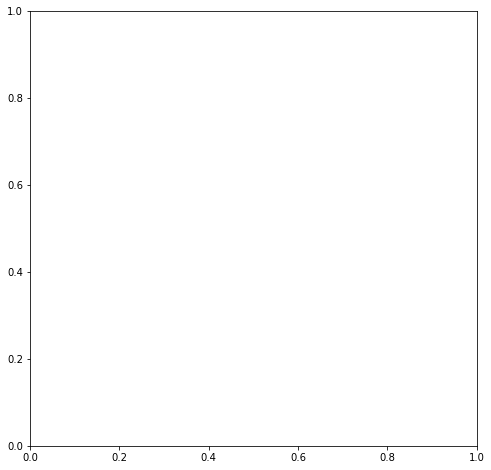

In [115]:
citySDC_data.regplot( x="Lat", y="Wind Speed",ci = None, figsize=(8,8), title="City Latitude vs Wind Speed (01/07/21)")
plt.show()

The r-value is: 0.46937863826630627


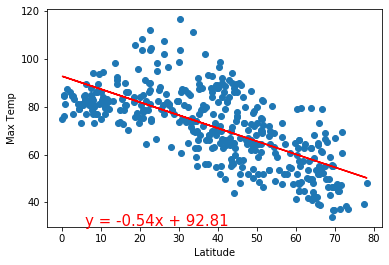

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6082708688906918


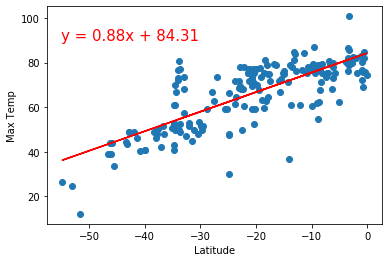

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.000543987878808455


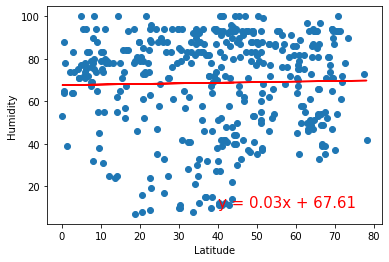

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.014985174297345524


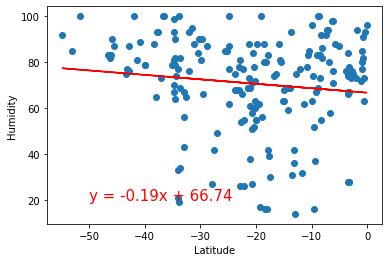

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0020898727664228514


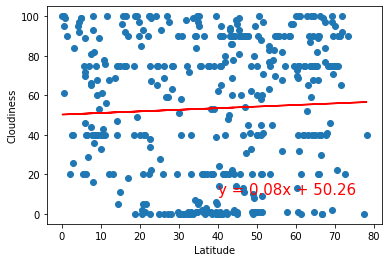

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0035263772085582894


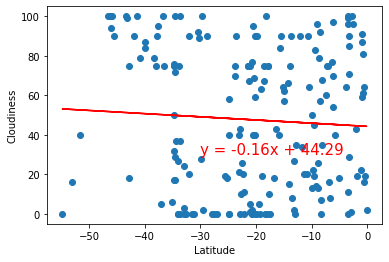

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.04019723576144484


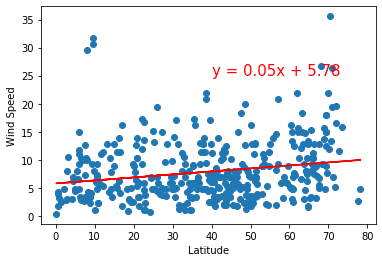

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.017128274759839232


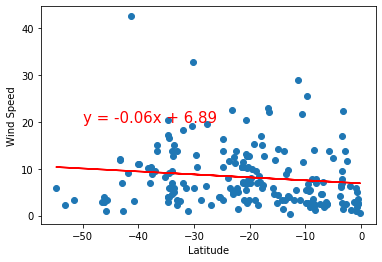